# Определение перспективного тарифа для  компании Мегалайн телеком

## Описание тарифов


### Тариф «Смарт»

- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

---

Стоимость услуг сверх тарифного пакета:

- минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

#### Для визуализации возьмём ***совершенно*** рандомную картинку из интернета, что бы она ассоциировалась у нас с этим тарифом

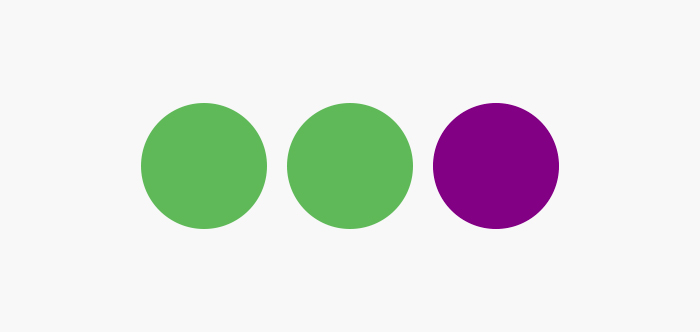

### Тариф «Ультра»

- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

---

Стоимость услуг сверх тарифного пакета:

- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

#### Опять же визуализируем и берём ***случайную*** картинку =)

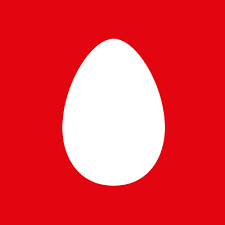

##### «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Задачи исследования
### 1. Подробный смотр  данных
- посмотрим наборы данных
- сделаем предварительные выводы


### 2. Подготовка данных

#### 1. Предобработка
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- привести данные к нужным типам

#### 2. Посчитайте для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам
- помесячную выручку с каждого пользователя
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана)

#### 3. Анализ данных
- Опишите поведение клиентов оператора, исходя из выборки
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифав месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение
- Постройте гистограммы. Опишите распределения
- Сравнение выручки пользователей из Москвы и других регионов

#### 4. Проверка гипотез
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
---

Пороговое значение alpha задаёмс самостоятельно

---

Поясните:

- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему

### 5. Результаты исследования
- Общие выводы
- Рекомендации

## Часть 1. Описание наборов данных, их получение, импорт библиотек

### Описание данных

#### Путь к файлам:

- /datasets/calls.csv
- /datasets/internet.csv
- /datasets/messages.csv
- /datasets/tariffs.csv
- /datasets/users.csv

### Описание таблиц

#### Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок



#### Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя


#### Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение


#### Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


#### Таблица users (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

In [1]:
#Библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st
# И рекомендация наставника из предыдущего проекта
import seaborn as sns

In [2]:
#Датасеты
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

### О таблице пользователей

In [3]:
users.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [4]:
print('____________ USERS INFO ____________')
users.info()

____________ USERS INFO ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [6]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [7]:
calls.duplicated().sum()

0

In [8]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

#### Что имеем?
- Есть данные по 500 пользователям, из них 70% пользуются тарифом смарт.
- Столбцы с датами нужно привести к правильному типу, но из за того что в других таблицах скорее всего тоже самое, чуть позже напишем функцию для этого дела
- Пропуски есть только в дате прекращения пользования тарифом, перешли пользователи на тариф Ультра, или нашли себе оператора получше, об этом история умалчивает

### О таблице звонков

In [9]:
calls.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


In [10]:
print('____________ CALLS INFO ____________')
calls.info()

____________ CALLS INFO ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [11]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [12]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [13]:
calls.duplicated().sum()

0

In [14]:
len(calls[calls.duration < 1])

47927

In [15]:
len(calls[calls.duration == 0])

39613

#### Что имеем?
- Неправильный тип времени как и ожидалось
- Длительность звонков можно привести в формат int64
- Информацию о двухста тысяч звонках - наших 500 пользователей 
- Оператор округляет даже секундные разговоры до 1 минуты, однако в таблице есть не полные значения и нулевые. Логика говорит если факт совершения звонка зафиксирован, даже нулевым значениям можно смело ставить минуту разговора
    - На секундочку, почти 25 % данных о времени звонков не корректны, стоит заметить этот момент
    

---
## Комментарий от наставника

Подумай также о возможных причинах появления ошибочных данных, а также о том, являются ли они случайными или нет. Можно высказать варианты их обработки.

---

### По сообщениям

In [16]:
messages.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [17]:
print('____________ MESSAGES INFO ____________')
messages.info()

____________ MESSAGES INFO ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [18]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [19]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [20]:
messages.duplicated().sum()

0

### Что не имеем?
- Дубликатов
- Пропущеных значений
- Нормального типа даты

### Таблица интернета

In [21]:
internet.head(3) 

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000


In [22]:
print('____________ INTERNET INFO ____________')
internet.info() 

____________ INTERNET INFO ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [23]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


In [24]:
internet.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [25]:
internet.duplicated().sum()

0

### Что с интернетом?
- Таблица хорошая
- Дата не очень
- Тип информации в столбце mb_used лучше был бы int64
- Есть сессии с нулевым потреблением трафика, можно поступить как и со звонками, но возможно не правильно. Стоит обратиться к заказчику и попробовать уточнить причины возникновения нулевых сессий
    - По этому у многих операторов трафик округляется только до мб

### Тарифы

In [26]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [27]:
print('____________TARIFFS INFO____________')
tariffs.info()

____________TARIFFS INFO____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Что по тарифам?
- Даже не знаю что тут написать тарифы как тарифы, пока рано судить.

 Лучше повизуализируем

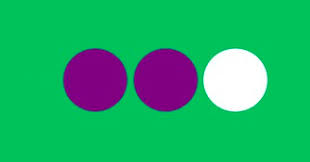

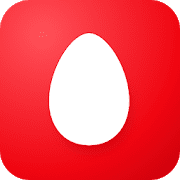

### Общий вывод по обзору данных
- В таблице "calls" всего 202607 записей, 5 колонок, пропусков нет.
- В таблице "internet" всего 149396 записей, 5 колонок, пропусков нет.
- В таблице "messages" всего 123036 записей, 4 колонки, пропусков нет.
- В таблице "tariffs" всего 2 записей, 9 колонок, пропусков нет.
- В таблице "users" всего 500 записей, 9 колонок, пропуски в колонке      "churn_date" (дата прекращения пользования тарифом).
---

Перед выполнением задачи нужно привести колонки дат в таблицах к правильному типу данных, заполнить нулевые звонки, добавить нужные нам столбцы


---
## Комментарий от наставника

Первый взгляд на таблицы выполнен довольно детально.

---

## 2. Подготовка данных

### 1. Предобработка
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- привести данные к нужным типам

### 2. Посчитайте для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам
- помесячную выручку с каждого пользователя
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана)

In [28]:
# Функция для дат
dtformat = '%Y-%m-%d'

def to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col], format=dtformat)


In [29]:
# Приводим даты к нужному типу
to_datetime(users, ['reg_date', 'churn_date'])
to_datetime(calls, ['call_date'])
to_datetime(messages, ['message_date'])
to_datetime(internet, ['session_date'])


In [30]:
#Проверка
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [31]:
# Звонки, округляем вверх
calls['duration'] = calls['duration'].apply(np.ceil)
cals_duration_1 = calls['duration'] > 0
calls['duration'].where(cals_duration_1, 1, inplace=True)

In [32]:
# Проверка
len(calls[calls.duration < 1])

0

In [33]:
len(calls[calls.duration == 0])

0

In [34]:
# Потребление трафика
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet_session_1 = internet['mb_used'] > 0
internet['mb_used'].where(internet_session_1, 1, inplace=True)

In [35]:
#Проверка
len(internet[internet.mb_used == 0])

0

Если округлять трафик до гб, то лучше это делать зная расчетный период пользователей или хотя бы посчитав потребление трафика по месяцам. (Это будет немного дальше)

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [36]:
# Это будет финальная таблица
costs = pd.DataFrame()

In [37]:
# Добавляем столбец месяцы
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [38]:
# Делаем сводною таблицу
calls_by_month = calls.pivot_table(
    index=['month', 'user_id'],
    values='duration',
    aggfunc=['count', 'sum']
)

In [39]:
# Преобразовываем в масив
tmp_df = pd.DataFrame(calls_by_month.to_records())

In [40]:
# Добавляем в финальную таблицу
costs['user_id'] = tmp_df['user_id']
costs['month']   = tmp_df['month']
costs['calls']   = tmp_df.iloc[:, 2]
costs['minutes'] = tmp_df.iloc[:, 3]

#### Количество отправленных сообщений по месяцам

In [41]:
# Добавляем столбец месяцы
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [42]:
# Делаем сводною таблицу
messages_by_month = messages.pivot_table(
    index=['month', 'user_id'],
    values='id',
    aggfunc='count'
)

In [43]:
# Преобразовываем в масив
tmp_df = pd.DataFrame(messages_by_month.to_records()).rename(columns={'id': 'messages'})

In [44]:
# Приклеиваем к финальной таблице
costs = costs.merge(tmp_df, on=['user_id', 'month'], how='outer')

In [45]:
costs.head()

,user_id,month,calls,minutes,messages
0,1005,1,15.0,99.0,7.0
1,1032,1,61.0,397.0,38.0
2,1045,1,1.0,9.0,5.0
3,1055,1,64.0,568.0,30.0
4,1071,1,24.0,200.0,16.0


---
## Комментарий от наставника

Стоит выводить предварительные таблицы на печать для понимания того, что все работает, как и должно.

---

#### Количество отправленных сообщений по месяцам

In [46]:
# Добавляем столбец месяцы
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [47]:
# Делаем сводною таблицу
messages_by_month = messages.pivot_table(
    index=['month', 'user_id'],
    values='id',
    aggfunc='count'
)

In [48]:
# Преобразовываем в масив
tmp_df = pd.DataFrame(messages_by_month.to_records()).rename(columns={'id': 'messages'})

In [49]:
# Приклеиваем к финальной таблице
costs = costs.merge(tmp_df, on=['user_id', 'month'], how='outer')

#### Объем израсходованного интернет-трафика по месяцам

In [50]:
# Добавляем столбец месяцы
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [51]:
# Делаем сводною таблицу
internet_by_month = internet.pivot_table(
    index=['month', 'user_id'],
    values='mb_used',
    aggfunc='sum'
)

In [52]:
# Преобразовываем в масив
tmp_df = pd.DataFrame(internet_by_month.to_records())

In [53]:
# Приклеиваем к финальной таблице
costs = costs.merge(tmp_df, on=['user_id', 'month'], how='outer')

In [54]:
#Проверка сделанного
costs.head(3)

,user_id,month,calls,minutes,messages_x,messages_y,mb_used
0,1005,1,15.0,99.0,7.0,7.0,2730.0
1,1032,1,61.0,397.0,38.0,38.0,24158.0
2,1045,1,1.0,9.0,5.0,5.0,2348.0


In [55]:
#Уберём дублирующийся столбец переименовав его
costs['messages'] = costs['messages_x']
costs.drop(columns=['messages_y'], inplace=True)
costs.drop(columns=['messages_x'], inplace=True)

In [56]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
calls       3174 non-null float64
minutes     3174 non-null float64
mb_used     3203 non-null float64
messages    2717 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [57]:
#Похоже при склейке изменился тип данных в  некоторых столбцах
not_is_int64 = ['calls', 'minutes', 'messages', 'mb_used']

for f in not_is_int64:
    costs[f] = costs[f].fillna(0).astype('int64')

In [58]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
calls       3214 non-null int64
minutes     3214 non-null int64
mb_used     3214 non-null int64
messages    3214 non-null int64
dtypes: int64(6)
memory usage: 175.8 KB


In [59]:
costs.duplicated().sum()

0

#### Помесячная выручка с каждого пользователя

In [60]:
# Для удобства добавим в датафрейм информацию о пользователях и тарифах
# Для начала конечно изменив название столбца для корректной merge изменив
tariffs = tariffs.rename(columns={'tariff_name': 'tariff', 'mg_per_month_included': 'mb_per_month_included'})
costs = costs.merge(users, on='user_id', how='left').merge(tariffs, on='tariff', how='left')

In [61]:
# Перерасход минут, сообщений и трафика посчитаем как разницу между месячным значением и включенным в тариф
# Положительные значение - это будет перерасход, а отрицательные остаток пакета
costs['minutes_over']  = costs['minutes'] - costs['minutes_included']
costs['messages_over'] = costs['messages'] - costs['messages_included']
costs['mb_used_over']  = costs['mb_used'] - costs['mb_per_month_included']

In [62]:
#Функция для подсчета общего дохода с юзера за месяц
def total_rub_per_mouth(row):   
    minutes_price = 0
    messages_price = 0
    mb_used_price = 0
    if row['minutes_over'] > 0:
        minutes_price = row['minutes_over'] * row['rub_per_minute']
    if row['messages_over'] > 0:
        messages_price = row['messages_over'] * row['rub_per_message']
    if row['mb_used_over'] > 0:
        mb_used_price = (row['mb_used_over'] / 1024) * row['rub_per_gb']# в Гб перевели
    return minutes_price + messages_price + mb_used_price

In [63]:
# Применим
costs['rub_monthly_fee_over'] = costs.apply(total_rub_per_mouth, axis=1)
costs['rub_monthly_fee_total'] = costs['rub_monthly_fee'] + costs['rub_monthly_fee_over']

In [64]:
# Оставим только необходимые столбцы (это как картошку чистить =))
costs = pd.DataFrame(
    costs[['month', 'tariff', 'user_id', 'city',
           'calls', 'minutes', 'messages', 'mb_used',
           'minutes_over', 'messages_over', 'mb_used_over',
           'rub_monthly_fee_over', 'rub_monthly_fee_total']]
)

In [65]:
costs.head(3)

,month,tariff,user_id,city,calls,minutes,messages,mb_used,minutes_over,messages_over,mb_used_over,rub_monthly_fee_over,rub_monthly_fee_total
0,1,smart,1005,Набережные Челны,15,99,7,2730,-401,-43,-12630,0.000000,550.000000
1,1,smart,1032,Ульяновск,61,397,38,24158,-103,-12,8798,1718.359375,2268.359375
2,1,smart,1045,Улан-Удэ,1,9,5,2348,-491,-45,-13012,0.000000,550.000000


In [66]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
month                    3214 non-null int64
tariff                   3214 non-null object
user_id                  3214 non-null int64
city                     3214 non-null object
calls                    3214 non-null int64
minutes                  3214 non-null int64
messages                 3214 non-null int64
mb_used                  3214 non-null int64
minutes_over             3214 non-null int64
messages_over            3214 non-null int64
mb_used_over             3214 non-null int64
rub_monthly_fee_over     3214 non-null float64
rub_monthly_fee_total    3214 non-null float64
dtypes: float64(2), int64(9), object(2)
memory usage: 351.5+ KB


In [67]:
costs.describe()

,month,user_id,calls,minutes,messages,mb_used,minutes_over,messages_over,mb_used_over,rub_monthly_fee_over,rub_monthly_fee_total
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,8.317362,1251.590230,63.038892,463.570006,38.281269,17233.682950,-802.609210,-302.866833,-2833.722153,520.340594,1499.400955
std,2.905413,144.659172,33.236368,247.918544,36.148326,7579.211552,1127.805286,432.128178,9293.488896,744.567642,787.006116
min,1.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,-1000.000000,-30720.000000,0.000000,550.000000
25%,6.000000,1125.000000,40.000000,291.000000,9.000000,12507.750000,-2161.750000,-907.000000,-7879.750000,0.000000,713.830078
50%,9.000000,1253.000000,62.000000,456.000000,30.000000,16969.500000,-191.000000,-38.000000,-1058.500000,123.000000,1591.011719
75%,11.000000,1378.750000,82.000000,605.000000,57.000000,21453.500000,2.750000,-10.000000,3582.000000,858.574219,1950.000000
max,12.000000,1499.000000,244.000000,1727.000000,224.000000,49793.000000,971.000000,93.000000,23267.000000,6218.335938,6768.335938


In [68]:
costs.isna().sum()

month                    0
tariff                   0
user_id                  0
city                     0
calls                    0
minutes                  0
messages                 0
mb_used                  0
minutes_over             0
messages_over            0
mb_used_over             0
rub_monthly_fee_over     0
rub_monthly_fee_total    0
dtype: int64

In [69]:
costs.duplicated().sum()

0

### Теперь у нас есть информация по месецам, а именно:
- количество сделанных звонков и израсходованных минут разговора
- количество отправленных сообщений в месяц
- объем израсходованного интернет трафика в мегабайтах
- общий доход с юзера за звонки, сообения и трафик с учётом входящих в пакет по тарифу
- красивая таблица

## 3. Анализ полученных данных

- Опишите поведение клиентов оператора, исходя из выборки
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифав месяц?
- Посчитайте среднее количество, дисперсию и стандартное отклонение
- Постройте гистограммы. Опишите распределения
- Сравнение выручки пользователей из Москвы и других регионов

### Посмотрим данные пользователей одного и другого тарифа по месяцам

In [70]:
user_values = ['minutes', 'messages', 'mb_used', 'rub_monthly_fee_over', 'rub_monthly_fee_total']

# Сделаем сводную таблицу
tariff_monthly_costs = costs.pivot_table(
    index=['tariff', 'month'],
    values=user_values
)

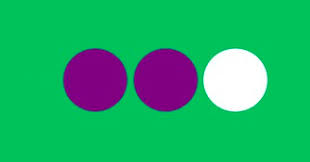

In [71]:
smart_monthly_costs = tariff_monthly_costs.loc['smart']
smart_monthly_costs

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
month,,,,,
1,8528.588235,18.235294,209.647059,154.895910,704.895910
2,11617.344828,24.086207,306.310345,262.159752,812.159752
3,15131.207792,31.857143,400.532468,583.213271,1133.213271
4,13486.080357,30.741071,377.000000,384.781878,934.781878
5,15832.751773,33.773050,398.404255,611.004377,1161.004377
6,15822.445122,33.402439,406.701220,614.601038,1164.601038
7,15771.398010,33.751244,419.288557,635.629392,1185.629392
8,16640.212766,33.638298,433.191489,726.647008,1276.647008
9,16332.615385,33.638462,440.080769,667.753456,1217.753456


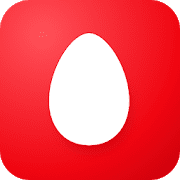

In [72]:
ultra_monthly_costs = tariff_monthly_costs.loc['ultra']
ultra_monthly_costs

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
month,,,,,
1,13154.666667,33.777778,440.888889,0.000000,1950.000000
2,11788.333333,21.958333,304.666667,23.095703,1973.095703
3,17553.513514,32.297297,503.081081,54.254645,2004.254645
4,16845.254545,31.563636,470.072727,45.474077,1995.474077
5,19383.194030,37.850746,524.865672,105.022738,2055.022738
6,18943.928571,41.726190,492.428571,82.109724,2032.109724
7,20516.571429,49.846154,560.296703,158.562092,2108.562092
8,19595.878505,48.439252,524.570093,121.230195,2071.230195
9,19224.043478,52.286957,553.643478,63.776749,2013.776749


### Минуты разговора, количество сообщений и обьём трафика в среднем необходимые пользователям каждого тарифа в месяц

In [73]:
tariff_usage = tariff_monthly_costs.pivot_table(
    index='tariff',
    values=user_values
)

In [74]:
tariff_usage

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
tariff,,,,,
smart,15085.107080,31.413211,397.374228,595.673948,1145.673948
ultra,18224.477581,43.714983,509.356551,88.972927,2038.972927


- Пользователи тарифа "Ультра" более активны, но пользователи тарифа "Смарт" тратят в среднем почти в 6 раз больше на дополнительные пакеты услуг. Оператор может использовать это для рекламы или новых тарифов.
- Оператору больше денег приносит тариф "Ультра", даже с учетом того, что в среднем пользователи не выходят за границы тарифных лимитов, а пользователи тарифа "Смарт" не тратят столько денег, чтобы перегнать стоимость тарифа "Ультра". Таким образом, для пользователя выгоднее тариф "Смарт".
- пользователи тарифа смарт в среднем полностью расходуют пакет интернета (15гб)
- пользователи тарифа ультра в среднем используют всего на 3 гб трафика больше чем пользователи тарифа "Смарт"

### Cреднее количество, дисперсия и стандартное отклонение

#### Минуты

In [75]:
smart_costs = costs.query("tariff == 'smart'")
smart_costs['minutes'].mean()

429.45087483176314

In [76]:
ultra_costs = costs.query("tariff == 'ultra'")
ultra_costs['minutes'].mean()

540.7796954314721

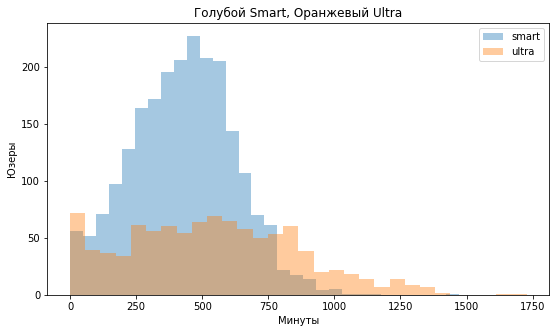

In [78]:
fig, ax = plt.subplots(figsize = (9,5))
sns.distplot(smart_costs['minutes'], bins=30, kde=False, label='smart')
sns.distplot(ultra_costs['minutes'], bins=30, kde=False, label='ultra')
ax.set_title("Голубой Smart, Оранжевый Ultra")
plt.xlabel('Минуты')
plt.ylabel('Юзеры')
plt.legend()
plt.show()

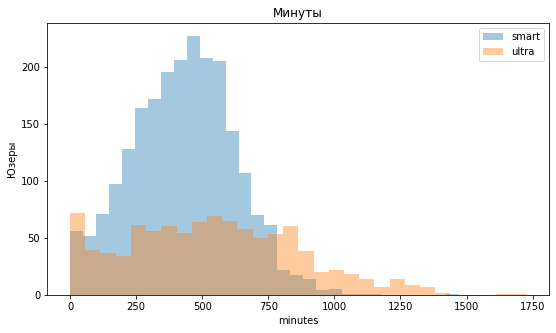

In [79]:
# Пример
fig, ax = plt.subplots(figsize = (9,5))
sns.distplot(smart_costs['minutes'], bins=30, kde=False, label='smart')
sns.distplot(ultra_costs['minutes'], bins=30, kde=False, label='ultra')
ax.set_title("Минуты")
plt.ylabel('Юзеры')
plt.legend()
plt.show()

In [80]:
#Дисперсия по тарифу Смарт
np.var(smart_costs['minutes'], ddof=1)

37974.774627825

In [81]:
#Дисперсия по тарифу Ультра
np.var(ultra_costs['minutes'], ddof=1)

106105.72682307787

#### Минуты
- Смарт
    - Среднее 429.45
    - Стандартное отклонение = 194.87 (корень дисперсии)
    - Дисперсия = 37,974.77
- Ультра
    - Среднее = 540.77
    - Стандартное отклонение = 325.73
    - Дисперсия = 106105.72

#### Сообщения

In [82]:
smart_costs['messages'].mean()

33.384028712427096

In [83]:
ultra_costs['messages'].mean()

49.36345177664975

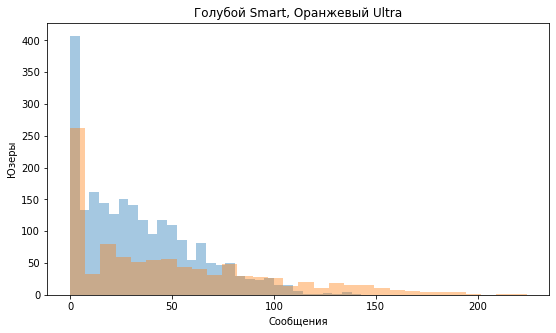

In [84]:
fig, ax = plt.subplots(figsize = (9,5))
sns.distplot(smart_costs['messages'], bins=30, kde=False)
sns.distplot(ultra_costs['messages'], bins=30, kde=False)
ax.set_title("Голубой Smart, Оранжевый Ultra")
plt.xlabel('Сообщения')
plt.ylabel('Юзеры')
plt.show()

In [85]:
np.var(smart_costs['messages'], ddof=1)

796.8129584480083

In [86]:
np.var(ultra_costs['messages'], ddof=1)

2285.266142544674

#### Сообщения
- Смарт
    - Среднее 33.38
    - Стандартное отклонение = 28.22
    - Дисперсия = 796.81	
- Ультра
    - Среднее = 49.36
    - Стандартное отклонение = 47.80
    - Дисперсия = 2,285.27
    
---

##### Сообщениями многие не польуются, что не удивительно в эпоху мессенджеров и социальных сетей

#### Интернет

In [87]:
smart_costs['mb_used'].mean()

16237.184387617766

In [88]:
ultra_costs['mb_used'].mean()

19488.703553299492

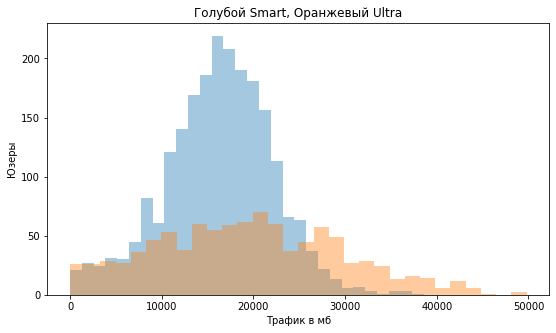

In [89]:
fig, ax = plt.subplots(figsize = (9,5))
sns.distplot(smart_costs['mb_used'], bins=30, kde=False)
sns.distplot(ultra_costs['mb_used'], bins=30, kde=False)
ax.set_title("Голубой Smart, Оранжевый Ultra")
plt.xlabel('Трафик в мб')
plt.ylabel('Юзеры')
plt.show()

In [90]:
np.var(smart_costs['mb_used'], ddof=1)

34571991.09480103

In [91]:
np.var(ultra_costs['mb_used'], ddof=1)

101951580.68642029

#### Интернет
- Смарт
    - Среднее 16237.18
    - Стандартное отклонение = 5879.79
    - Дисперсия = 345,719,91.09	
- Ультра
    - Среднее = 19488.70
    - Стандартное отклонение = 10097.10
    - Дисперсия = 101,951,580.68

### Сравнение выручки пользователей из Москвы и других регионов

In [92]:
#Создадим переменную
moscow = costs['city'] == 'Москва'
# Заменим значения вне переменной на другие
costs['city'].where(moscow, 'Другой регион', inplace=True)

city_costs = costs.pivot_table(
    index=['city', 'month'],
    values=user_values
)

city_costs_mean = city_costs.pivot_table(
    index='city',
    values=user_values
)


In [93]:
city_costs_mean

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
city,,,,,
Другой регион,15681.785666,35.268458,424.594742,451.974045,1398.514093
Москва,17603.175813,33.944639,455.792652,388.889460,1483.854730


#### По средним значениям выручки пользователей Москвы и регионов мы видим, что разница в среднем меньше 100 рублей. Юзеры отправляют примерно одинаково смс в среднем и звонят тоже почти одинаково. В Москве чуть больше потребляют трафика 

## 4. Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
---

Пороговое значение alpha задаём самостоятельно

---

Поясните:

- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему

Мы рассматриваем две генеральные сопокупности – пользователей разных тарифов мобильного оператора. Проверим две (двусторонние) гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Чтобы понять, различается ли средняя выручка пользователей разных тарифов и населенных пунктов, значима ли разница между средними значениями, проведем статистические тест

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается
- Средняя выручка пользователя тарифа "Смарт": 1145.67 руб
- Средняя выручка пользователя тарифа "Ультра": 2038.97 руб
 

#### Нулевая гипотеза H₀:

- Средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается

#### Исходя из H₀ формулируется альтернативная гипотеза H₁:

- Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

Пороговое значение alpha (критический уровень статистической значимости) зададим равным стандартным 5%.

In [94]:
alpha = .05

results = st.ttest_ind(
    smart_costs['rub_monthly_fee_total'], 
    ultra_costs['rub_monthly_fee_total'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.009674149482176e-180
Отвергаем нулевую гипотезу


Средняя выручка по тарифам не одинакова, и практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится. Следовательно, средняя выручка пользователей тарифов "Ультра" и "Смарт" действительно различается и наша гипотеза подтвердилась.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
- Средняя выручка пользователей из Москвы: 1464.53 руб
- Средняя выручка пользователей из других регионов: 1387.79 руб

#### Нулевая гипотеза H₀:

- Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

#### Исходя из H₀ формулируется альтернативная гипотеза H₁:

- Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Пороговое значение alpha (критический уровень статистической значимости) зададим равным стандартным 5%.

In [95]:
alpha = .05

moscow = costs.query("city == 'Москва'")['rub_monthly_fee_total']
other_cities = costs.query("city == 'Другой регион'")['rub_monthly_fee_total']

results = st.ttest_ind(moscow, other_cities)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5220687323801865
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выручка пользователей из Москвы и регионов неодинакова, с вероятностью в почти 52% такое различие можно получить случайно. Как мы уже знаем, это слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками. Таким образом, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, и наша гипотеза не подтвердилась.

## 5. Общий вывод

Из двух наших гипотез подтвердилась только первая:

- Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Отвечая на вопрос "какой тариф лучше" исходя из вышеприведенного анализа выборочных совокупностей и гипотезы, можем сказать:

- для оператора – тариф Ультра (он приносит почти в 2 раза больше прибыли)
- для пользователя – тарифа Смарт ( даже с учетом что клиентам приходится переплачивать за пакеты, в среднем они даже не приближаются к порогам пакета Ультра

Оператору стоит пересмотреть тариф Ультра.
В нем можно было бы:
- понизить ценник для привлекательности
- урезать пакеты без особого ущерба для среднего пользователя
- пакеты смс сделать до смешного минимальными всё равно все пользуются мессенджерами и социальными сетями
- сделать мессенджеры бесплатными в плане потребления трафика ( они всё равно ничего не едять почти)

Так же стоит задуматься о правильном сборе данных и анонимизации клиентов, а то мало ли попадётся ушлый аналитик) ещё бы пасспортные данные включили в таблицы =)


